In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# annotation_timing_memory.csv 

In [98]:
atm_df = pd.read_csv('logs/annotation_timing_memory.csv')
atm_df['time (ns)'] = atm_df['time (ns)'].astype(int)
atm_df['time (s)'] = atm_df['time (ns)'] / 1e9
atm_df['unannotated (MB)'] = atm_df['unannotated_size'] / 1024 / 1024
atm_df['annotated (MB)'] = atm_df['annotated_size'] / 1024 / 1024
atm_df.head()

,trial,nrows,nbins,unannotated_size,annotated_size,time (ns),time (s),unannotated (MB),annotated (MB)
0,0,1000,10,46000,47460,5136501,0.005137,0.043869,0.045261
1,1,1000,10,46000,47460,1630200,0.001630,0.043869,0.045261
2,2,1000,10,46000,47460,1442500,0.001442,0.043869,0.045261
3,3,1000,10,46000,47460,1317300,0.001317,0.043869,0.045261
4,4,1000,10,46000,47460,1310200,0.001310,0.043869,0.045261


Text(0, 0.5, 'Time (s)')

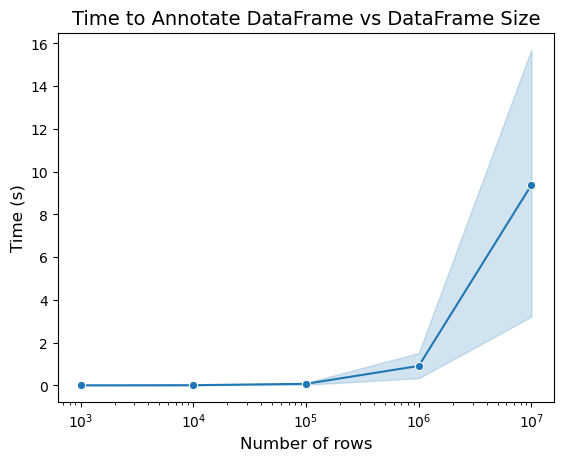

In [99]:
ax = sns.lineplot(data=atm_df, x='nrows', y='time (s)', marker='o')
ax.set_xscale('log')

ax.set_title('Time to Annotate DataFrame vs DataFrame Size', fontsize=14)
ax.set_xlabel('Number of rows', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12)

Text(0, 0.5, 'Time (s)')

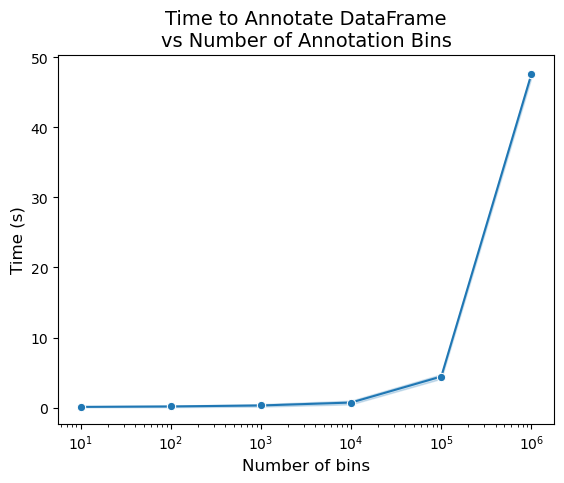

In [100]:
ax = sns.lineplot(data=atm_df, x='nbins', y='time (s)', marker='o')
ax.set_xscale('log')

ax.set_title('Time to Annotate DataFrame\nvs Number of Annotation Bins', fontsize=14)
ax.set_xlabel('Number of bins', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12)

Text(0, 0.5, 'Annotation Size (MB)')

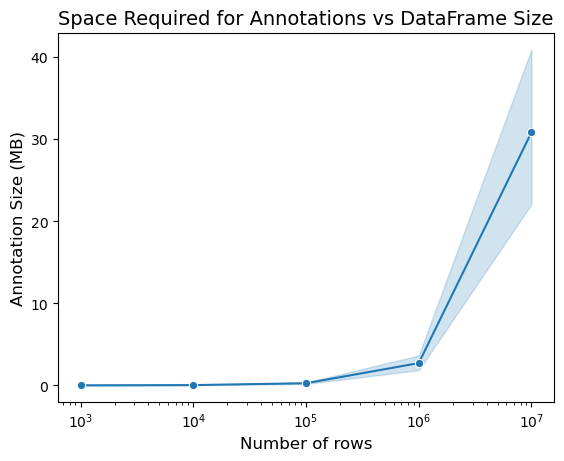

In [101]:
overhead = atm_df['annotated (MB)'] - atm_df['unannotated (MB)']
ax = sns.lineplot(data=atm_df, x='nrows', y=overhead, marker='o')
ax.set_xscale('log')

ax.set_title('Space Required for Annotations vs DataFrame Size', fontsize=14)
ax.set_xlabel('Number of rows', fontsize=12)
ax.set_ylabel('Annotation Size (MB)', fontsize=12)

Text(0, 0.5, 'Annotation Size (MB)')

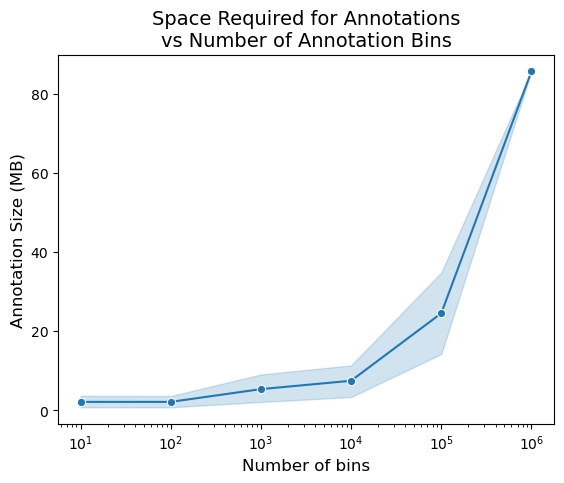

In [102]:
overhead = atm_df['annotated (MB)'] - atm_df['unannotated (MB)']
ax = sns.lineplot(data=atm_df, x='nbins', y=overhead, marker='o')
ax.set_xscale('log')

ax.set_title('Space Required for Annotations\nvs Number of Annotation Bins', fontsize=14)
ax.set_xlabel('Number of bins', fontsize=12)
ax.set_ylabel('Annotation Size (MB)', fontsize=12)

# filter_timing_equals.csv

In [103]:
fte_df = pd.read_csv('logs/filter_timing_equals.csv')
fte_df['time (ns)'] = fte_df['time (ns)'].astype(int)
fte_df['time (s)'] = fte_df['time (ns)'] / 1e9

fte_df['filter'] = fte_df['filter'].map({
    'filter1': 'df[mask]',
    'filter2': 'df.loc[mask]',
    'filter3': 'np.where(mask)'
})

fte_df.head()

,trial,nrows,nbins,filter,sketch_size,time (ns),time (s)
0,0,1000,10,df[mask],1,418200,0.000418
1,1,1000,10,df[mask],1,379500,0.000380
2,2,1000,10,df[mask],1,328100,0.000328
3,3,1000,10,df[mask],1,326000,0.000326
4,4,1000,10,df[mask],1,322300,0.000322


Text(0, 0.5, 'Time (s)')

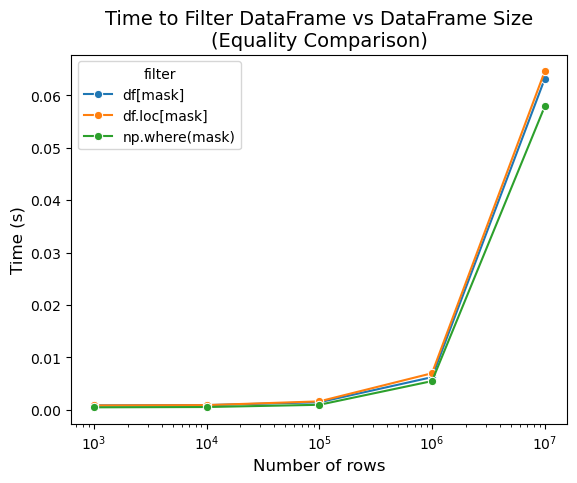

In [104]:
ax = sns.lineplot(data=fte_df, x='nrows', y='time (s)', marker='o', hue='filter', errorbar=None)
ax.set_xscale('log')

ax.set_title('Time to Filter DataFrame vs DataFrame Size\n(Equality Comparison)', fontsize=14)
ax.set_xlabel('Number of rows', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12) 

Text(0, 0.5, 'Time (s)')

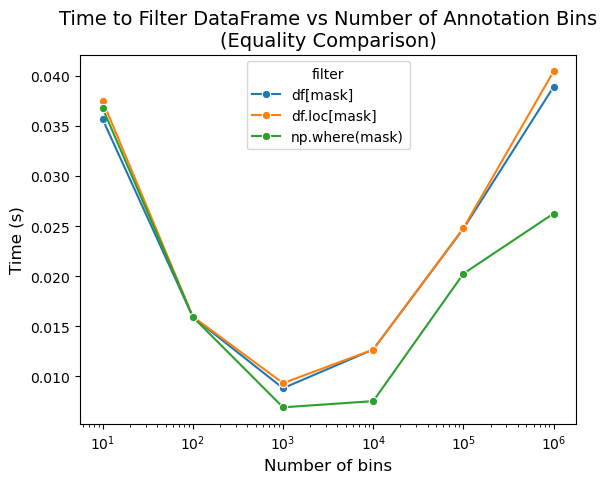

In [105]:
ax = sns.lineplot(data=fte_df, x='nbins', y='time (s)', marker='o', hue='filter', errorbar=None)
ax.set_xscale('log')

ax.set_title('Time to Filter DataFrame vs Number of Annotation Bins\n(Equality Comparison)', fontsize=14)
ax.set_xlabel('Number of bins', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12) 

Text(0, 0.5, 'Time (s)')

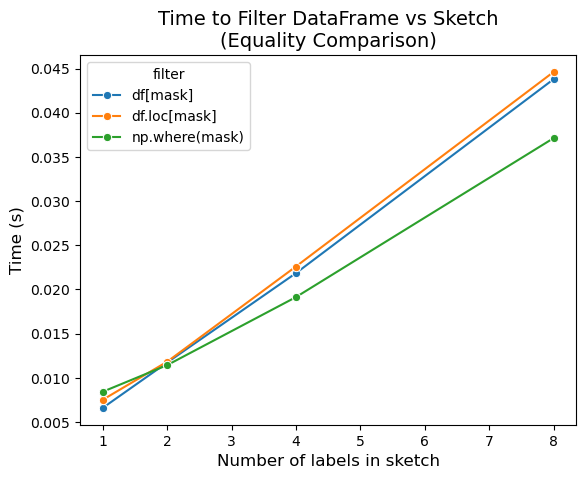

In [106]:
ax = sns.lineplot(data=fte_df, x='sketch_size', y='time (s)', marker='o', hue='filter', errorbar=None)

ax.set_title('Time to Filter DataFrame vs Sketch\n(Equality Comparison)', fontsize=14)
ax.set_xlabel('Number of labels in sketch', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12) 

In [107]:
fti_df = pd.read_csv('logs/filter_timing_isin.csv')
fti_df['time (ns)'] = fti_df['time (ns)'].astype(int)
fti_df['time (s)'] = fti_df['time (ns)'] / 1e9

fti_df['filter'] = fti_df['filter'].map({
    'filter1': 'df[mask]',
    'filter2': 'df.loc[mask]',
    'filter3': 'np.where(mask)'
})

fti_df.head()

,trial,nrows,nbins,filter,sketch_size,time (ns),time (s)
0,0,1000,10,df[mask],1,505700,0.000506
1,1,1000,10,df[mask],1,431300,0.000431
2,2,1000,10,df[mask],1,413700,0.000414
3,3,1000,10,df[mask],1,423500,0.000423
4,4,1000,10,df[mask],1,395300,0.000395


Text(0, 0.5, 'Time (s)')

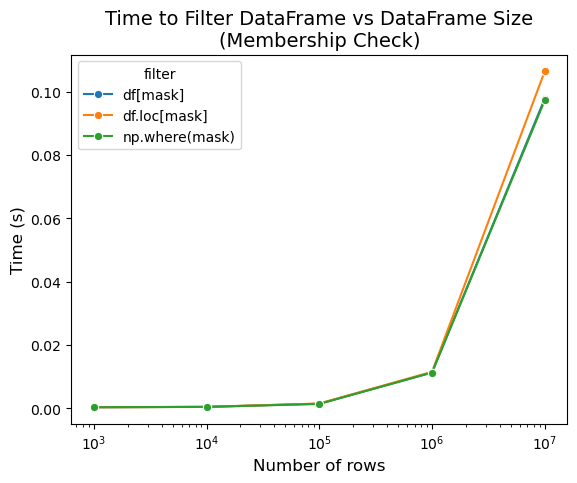

In [108]:
ax = sns.lineplot(data=fti_df, x='nrows', y='time (s)', marker='o', hue='filter', errorbar=None)
ax.set_xscale('log')

ax.set_title('Time to Filter DataFrame vs DataFrame Size\n(Membership Check)', fontsize=14)
ax.set_xlabel('Number of rows', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12) 

Text(0, 0.5, 'Time (s)')

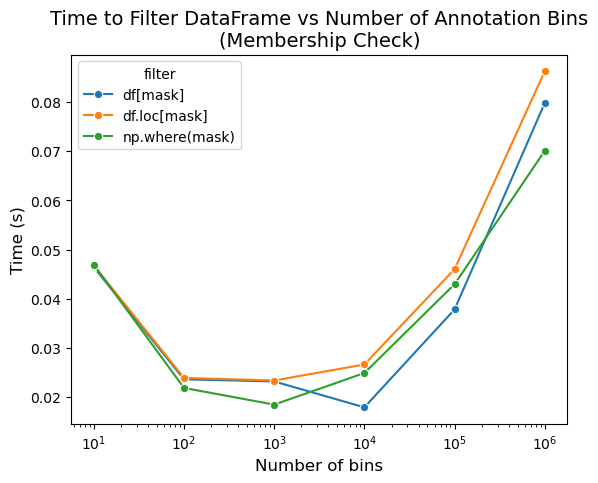

In [109]:
ax = sns.lineplot(data=fti_df, x='nbins', y='time (s)', marker='o', hue='filter', errorbar=None)
ax.set_xscale('log')

ax.set_title('Time to Filter DataFrame vs Number of Annotation Bins\n(Membership Check)', fontsize=14)
ax.set_xlabel('Number of bins', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12) 

Text(0, 0.5, 'Time (s)')

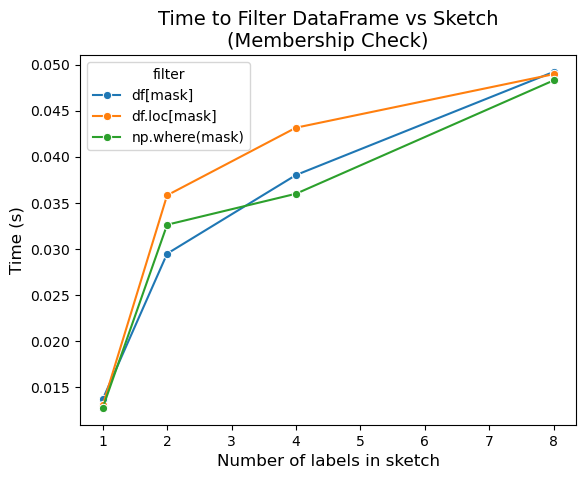

In [110]:
ax = sns.lineplot(data=fti_df, x='sketch_size', y='time (s)', marker='o', hue='filter', errorbar=None)

ax.set_title('Time to Filter DataFrame vs Sketch\n(Membership Check)', fontsize=14)
ax.set_xlabel('Number of labels in sketch', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12) 

# filter_timing_equals.csv and filter_timing_log.csv

In [111]:
fte_df = pd.read_csv('logs/filter_timing_equals.csv')
fte_df['time (ns)'] = fte_df['time (ns)'].astype(int)
fte_df['time (s)'] = fte_df['time (ns)'] / 1e9

fte_df['filter'] = fte_df['filter'].map({
    'filter1': 'df[mask]',
    'filter2': 'df.loc[mask]',
    'filter3': 'np.where(mask)'
})

fti_df = pd.read_csv('logs/filter_timing_isin.csv')
fti_df['time (ns)'] = fti_df['time (ns)'].astype(int)
fti_df['time (s)'] = fti_df['time (ns)'] / 1e9

fti_df['filter'] = fti_df['filter'].map({
    'filter1': 'df[mask]',
    'filter2': 'df.loc[mask]',
    'filter3': 'np.where(mask)'
})

Text(0, 0.5, 'Time (s)')

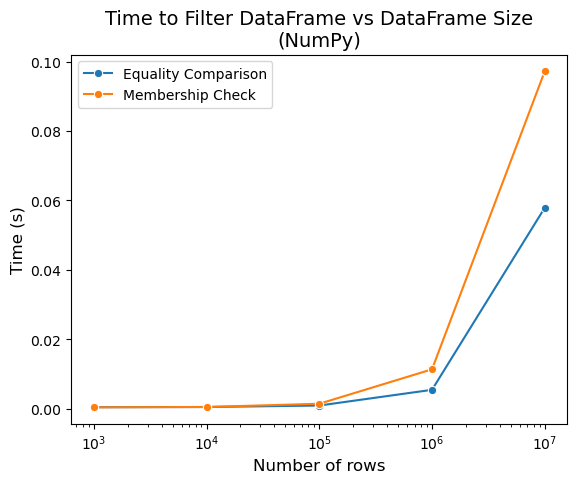

In [116]:
fte_df_f3 = fte_df[fte_df['filter'] == 'np.where(mask)']
fti_df_f3 = fti_df[fti_df['filter'] == 'np.where(mask)']

ax = sns.lineplot(data=fte_df_f3, x='nrows', y='time (s)', marker='o', label='Equality Comparison', errorbar=None)
ax = sns.lineplot(data=fti_df_f3, x='nrows', y='time (s)', marker='o', label='Membership Check', errorbar=None)
ax.set_xscale('log')

ax.set_title('Time to Filter DataFrame vs DataFrame Size\n(NumPy)', fontsize=14)
ax.set_xlabel('Number of rows', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12)


Text(0, 0.5, 'Time (s)')

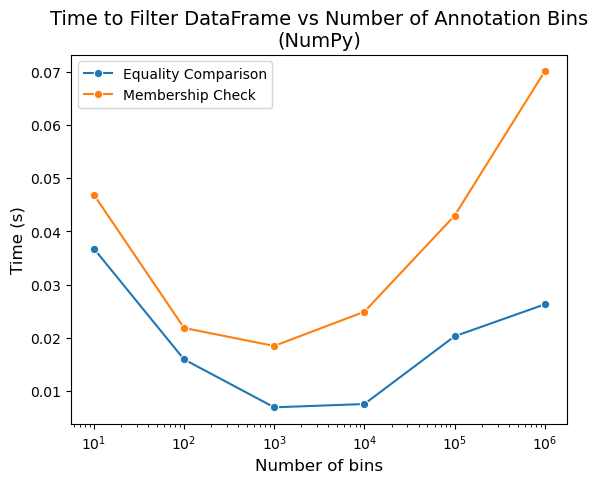

In [117]:
fte_df_f3 = fte_df[fte_df['filter'] == 'np.where(mask)']
fti_df_f3 = fti_df[fti_df['filter'] == 'np.where(mask)']

ax = sns.lineplot(data=fte_df_f3, x='nbins', y='time (s)', marker='o', label='Equality Comparison', errorbar=None)
ax = sns.lineplot(data=fti_df_f3, x='nbins', y='time (s)', marker='o', label='Membership Check', errorbar=None)
ax.set_xscale('log')

ax.set_title('Time to Filter DataFrame vs Number of Annotation Bins\n(NumPy)', fontsize=14)
ax.set_xlabel('Number of bins', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12)

Text(0, 0.5, 'Time (s)')

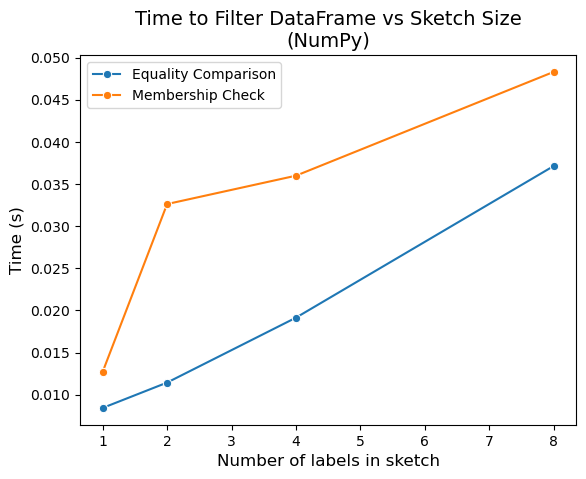

In [118]:
fte_df_f3 = fte_df[fte_df['filter'] == 'np.where(mask)']
fti_df_f3 = fti_df[fti_df['filter'] == 'np.where(mask)']

ax = sns.lineplot(data=fte_df_f3, x='sketch_size', y='time (s)', marker='o', label='Equality Comparison', errorbar=None)
ax = sns.lineplot(data=fti_df_f3, x='sketch_size', y='time (s)', marker='o', label='Membership Check', errorbar=None)

ax.set_title('Time to Filter DataFrame vs Sketch Size\n(NumPy)', fontsize=14)
ax.set_xlabel('Number of labels in sketch', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12)

# filter_timing_multi.csv

In [ ]:
fte_df = pd.read_csv('logs/filter_timing_equals.csv')
fte_df['time (ns)'] = fte_df['time (ns)'].astype(int)
fte_df['time (s)'] = fte_df['time (ns)'] / 1e9

fte_df['filter'] = fte_df['filter'].map({
    'filter1': 'df[mask]',
    'filter2': 'df.loc[mask]',
    'filter3': 'np.where(mask)'
})

fti_df = pd.read_csv('logs/filter_timing_isin.csv')
fti_df['time (ns)'] = fti_df['time (ns)'].astype(int)
fti_df['time (s)'] = fti_df['time (ns)'] / 1e9

fti_df['filter'] = fti_df['filter'].map({
    'filter1': 'df[mask]',
    'filter2': 'df.loc[mask]',
    'filter3': 'np.where(mask)'
})

ftm_df = pd.read_csv('logs/filter_timing_multi.csv')
ftm_df['time (ns)'] = ftm_df['time (ns)'].astype(int)
ftm_df['time (s)'] = ftm_df['time (ns)'] / 1e9

ftm_df['filter'] = ftm_df['filter'].map({
    'filter1': 'df[mask]',
    'filter2': 'df.loc[mask]',
    'filter3': 'np.where(mask)',
    'filter4': 'df.xs()'
})

Text(0, 0.5, 'Time (s)')

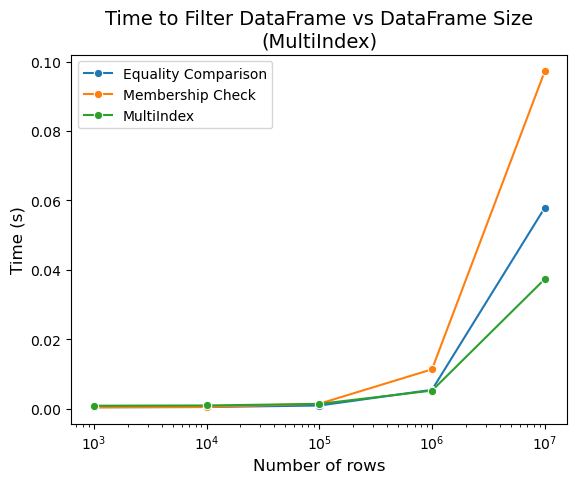

In [128]:
fte_df_f3 = fte_df[fte_df['filter'] == 'np.where(mask)']
fti_df_f3 = fti_df[fti_df['filter'] == 'np.where(mask)']
ftm_df_f4 = ftm_df[ftm_df['filter'] == 'df.xs()']

ax = sns.lineplot(data=fte_df_f3, x='nrows', y='time (s)', marker='o', label='Equality Comparison', errorbar=None)
ax = sns.lineplot(data=fti_df_f3, x='nrows', y='time (s)', marker='o', label='Membership Check', errorbar=None)
ax = sns.lineplot(data=ftm_df_f4, x='nrows', y='time (s)', marker='o', label='MultiIndex', errorbar=None)
ax.set_xscale('log')

ax.set_title('Time to Filter DataFrame vs DataFrame Size\n(MultiIndex)', fontsize=14)
ax.set_xlabel('Number of rows', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12)